In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
import pymysql
import pymysql.cursors

In [16]:
def connect_to_database():
    options = {
        'user': "root",
        'passwd': "root",
        'db': "KnowBase",
        'cursorclass' : pymysql.cursors.DictCursor
    }
    db = pymysql.connect(**options)
    db.autocommit(True)
    return db

def macro_precision(result, y, n_cluster):
    groupDict = {}
    i= 0
    for item in result:
        if item in groupDict:
            groupDict[item].append(i)
        else:
            groupDict[item] = [i]
        i = i + 1

    trueDict = {}
    i = 0
    for item in y:
        if item not in trueDict:
            trueDict[item] = [i]
        else:
            trueDict[item].append(i)
        i = i + 1

    inverseTrue = {}
    for key in trueDict.keys():
        for item in trueDict[key]:
            inverseTrue[item] = key
    
    totalNotSame = 0
    for key in groupDict.keys():
        temp = groupDict[key]
        f_id = -1
        i = 0
        control = True
        while i < len(temp) and control == True:
            f_id_cur = inverseTrue[temp[i]]
            if f_id == -1:
                f_id = f_id_cur
            else:
                if f_id_cur != f_id:
                    totalNotSame += 1
                    control = False
            i += 1
                    
    return (n_cluster-totalNotSame) / n_cluster

def macro_recall(result, y, n_cluster):
    return macro_precision(y, result, n_cluster)
    

def micro_precision(result, y):
    lenC = len(result)
    groupDict = {}
    i= 0
    for item in result:
        if item in groupDict:
            groupDict[item].append(i)
        else:
            groupDict[item] = [i]
        i = i + 1

    trueDict = {}
    i = 0
    for item in y:
        if item not in trueDict:
            trueDict[item] = [i]
        else:
            trueDict[item].append(i)
        i = i + 1

    inverseTrue = {}
    for key in trueDict.keys():
        for item in trueDict[key]:
            inverseTrue[item] = key
    
    totalSame = 0
    for key in groupDict.keys():
        temp = groupDict[key]
        output = {}
        maxO = 0
        maxKey = ""
        for item in temp:
            f_id = inverseTrue[item]
            if f_id not in output:
                output[f_id] = 1
            else:
                output[f_id] += 1
            
            if output[f_id] > maxO:
                maxO = output[f_id]
                maxKey = key
                
        totalSame += maxO
    return  totalSame / lenC
                
def micro_recall(result, y):
    return micro_precision(y, result)


def pairwise_precision(result, y):
    lenC = len(result)
    groupDict = {}
    i= 0
    for item in y:
        if item in groupDict:
            groupDict[item].append(i)
        else:
            groupDict[item] = [i]
        i = i + 1

    trueDict = {}
    i = 0
    for item in result:
        if item not in trueDict:
            trueDict[item] = [i]
        else:
            trueDict[item].append(i)
        i = i + 1

    inverseTrue = {}
    for key in trueDict.keys():
        for item in trueDict[key]:
            inverseTrue[item] = key
    
    totalPair = 0
    totalHit = 0
    for key in groupDict.keys():
        temp = groupDict[key]
        i = 0
        j = 0
        while i < len(temp):
            while j < len(temp):
                f_id_i = inverseTrue[temp[i]]
                f_id_j = inverseTrue[temp[j]]
                if f_id_i == f_id_j:
                    totalHit += 1
                j += 1
                totalPair += 1
            i += 1
        
    return  totalHit / totalPair


def pairwise_recall(result, y):
    lenC = len(result)
    groupDict = {}
    i= 0
    for item in y:
        if item in groupDict:
            groupDict[item].append(i)
        else:
            groupDict[item] = [i]
        i = i + 1

    trueDict = {}
    i = 0
    for item in result:
        if item not in trueDict:
            trueDict[item] = [i]
        else:
            trueDict[item].append(i)
        i = i + 1

    inverseGroup = {}
    for key in groupDict.keys():
        for item in groupDict[key]:
            inverseGroup[item] = key
    
    totalPair = 0
    totalHit = 0
    for key in trueDict.keys():
        temp = trueDict[key]
        i = 0
        j = 0
        while i < len(temp):
            while j < len(temp):
                f_id_i = inverseGroup[temp[i]]
                f_id_j = inverseGroup[temp[j]]
                if f_id_i == f_id_j:
                    totalHit += 1
                j += 1
                totalPair += 1
            i += 1
        
    return  totalHit / totalPair

In [6]:
def applyHAC(n_cluster_in, affinity_in, linkage_in):
    model = AgglomerativeClustering(n_clusters=n_cluster_in, affinity=affinity_in, linkage=linkage_in)
    model.fit(entity_input)
    result = model.labels_
    return result

In [7]:
distance = pd.read_csv("matNew.txt", sep=" ", header = None)

In [8]:
distance.pop(6918)
print(distance)

              0             1             2             3             4     \
0         0.000000      0.000000      5.151515     10.833333      8.867925   
1         0.000000      0.000000      5.151515     10.833333      8.867925   
2         5.151515      5.151515      0.000000     11.276596      8.181818   
3        10.833333     10.833333     11.276596      0.000000     11.276596   
4         8.867925      8.867925      8.181818     11.276596      0.000000   
5        10.833333     10.833333     11.276596      0.000000     11.276596   
6        10.833333     10.833333     11.276596      0.000000     11.276596   
7         8.867925      8.867925      8.181818     11.276596      0.000000   
8         0.000000      0.000000      5.151515     10.833333      8.867925   
9        10.833333     10.833333     11.276596      0.000000     11.276596   
10        8.867925      8.867925      8.181818     11.276596      0.000000   
11        8.867925      8.867925      8.181818     11.276596    

In [9]:
dbscan = DBSCAN(eps=1, min_samples=5, metric="precomputed")
labels = dbscan.fit_predict(distance)

In [10]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 170


In [32]:
sample = 5
eps_in = 0.1
e1 = []
result_num_cluster = []
while eps_in <= 3:
    dbscan = DBSCAN(eps=eps_in, min_samples=sample, metric="precomputed")
    labels = dbscan.fit_predict(distance)
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    #print('Estimated number of clusters: %d' % n_clusters_)
    e1.append(eps_in)
    result_num_cluster.append(n_clusters_)
    eps_in += 0.1

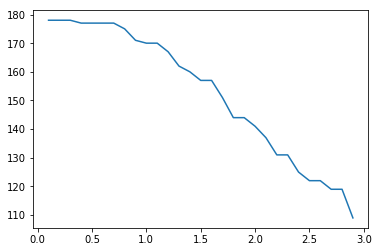

In [33]:
plt.plot(e1, result_num_cluster)
plt.show()

In [34]:
for i in range(len(e1)):
    print("eps: " + str(round(e1[i], 2)) + " Estimated number of clusters:: " + str(result_num_cluster[i]))

eps: 0.1 Estimated number of clusters:: 178
eps: 0.2 Estimated number of clusters:: 178
eps: 0.3 Estimated number of clusters:: 178
eps: 0.4 Estimated number of clusters:: 177
eps: 0.5 Estimated number of clusters:: 177
eps: 0.6 Estimated number of clusters:: 177
eps: 0.7 Estimated number of clusters:: 177
eps: 0.8 Estimated number of clusters:: 175
eps: 0.9 Estimated number of clusters:: 171
eps: 1.0 Estimated number of clusters:: 170
eps: 1.1 Estimated number of clusters:: 170
eps: 1.2 Estimated number of clusters:: 167
eps: 1.3 Estimated number of clusters:: 162
eps: 1.4 Estimated number of clusters:: 160
eps: 1.5 Estimated number of clusters:: 157
eps: 1.6 Estimated number of clusters:: 157
eps: 1.7 Estimated number of clusters:: 151
eps: 1.8 Estimated number of clusters:: 144
eps: 1.9 Estimated number of clusters:: 144
eps: 2.0 Estimated number of clusters:: 141
eps: 2.1 Estimated number of clusters:: 137
eps: 2.2 Estimated number of clusters:: 131
eps: 2.3 Estimated number of clu

In [25]:
db = connect_to_database()
cur = db.cursor()
string = "select b.freebase_id, b.entity, b.relation, b.value, b.link_am_score, b.link_scroe, b.base_id, "
string += "b.freebase_entity from NoiseEntity b"
cur.execute(string)
results = cur.fetchall()
groundTrue = {}
label = []
entity = []
entityDict = {}
y = []
i= 0
wordList = []
for result in results:
    if result["freebase_id"] not in groundTrue:
        groundTrue[result["freebase_id"]] = i
        label.append(result["freebase_entity"].lower())
        i = i + 1
    if result["entity"] not in entityDict:
        entityDict[result["entity"].lower()] = 1
    entity.append(result["entity"].lower())
    y.append(groundTrue[result["freebase_id"]])
    
    temp = {}
    temp["n"] = result["entity"].lower().split()
    list_A = result["relation"].lower().split()
    list_A.extend(result["value"].lower().split())
    temp["A"] = list_A
    temp["f_id"] = result["freebase_id"]
    temp["f_entity"] = result["freebase_entity"]
    temp["score"] = result["link_scroe"]
    temp["am_score"] = result["link_am_score"]
    temp["relation"] = result["relation"]
    temp["value"] = result["value"]
    temp["id"] = result["base_id"]
    wordList.append(temp)

In [19]:
bagList = []
bagDict = {}
i = 0
for key in entityDict.keys():
    for item in key.split():
        if item not in bagDict:
            bagList.append(item.lower())
            bagDict[item.lower()] = i
            i = i + 1
            
entity_input = []
temp = [0 for x in range(i)]

for word in entity:
    temp = [0 for x in range(i)]
    for item in word.split():
        index = bagDict[item.lower()]
        temp[index] = 1
    entity_input.append(temp) 

In [45]:
micro_pre = []
macro_pre = []
micro_re = []
macro_re = []
pairwise_pre = []
pairwise_re = []
for item in result_num_cluster:
    model = AgglomerativeClustering(n_clusters=item, affinity="precomputed", linkage="average")
    model.fit(distance)
    result = model.labels_
    micro_pre.append(micro_precision(result, y))
    micro_re.append(micro_recall(result, y))
    macro_pre.append(macro_precision(result, y, item))
    macro_re.append(macro_recall(result, y, item))
    pairwise_pre.append(pairwise_precision(result, y))
    pairwise_re.append(pairwise_recall(result, y))

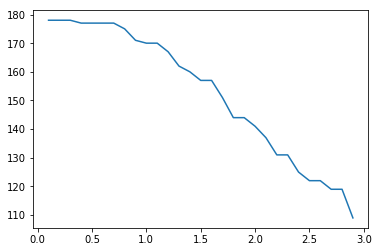

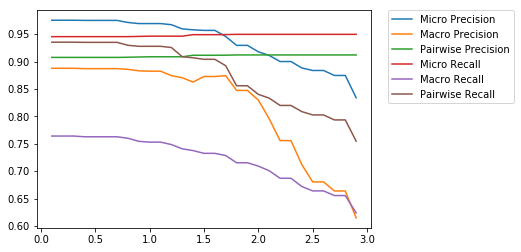

In [47]:
plt.plot(e1, result_num_cluster, label="original")
plt.show()
plt.plot(e1,micro_pre, label = "Micro Precision")
plt.plot(e1,macro_pre, label = "Macro Precision")
plt.plot(e1, pairwise_pre, label = "Pairwise Precision")
plt.plot(e1,micro_re, label = "Micro Recall")
plt.plot(e1,macro_re, label = "Macro Recall")
plt.plot(e1, pairwise_re, label = "Pairwise Recall")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

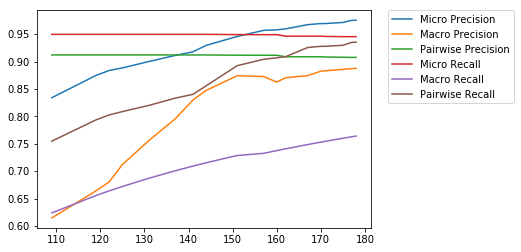

In [48]:
plt.plot(result_num_cluster,micro_pre, label = "Micro Precision")
plt.plot(result_num_cluster,macro_pre, label = "Macro Precision")
plt.plot(result_num_cluster, pairwise_pre, label = "Pairwise Precision")
plt.plot(result_num_cluster,micro_re, label = "Micro Recall")
plt.plot(result_num_cluster,macro_re, label = "Macro Recall")
plt.plot(result_num_cluster, pairwise_re, label = "Pairwise Recall")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [49]:
micro_pre1 = []
macro_pre1 = []
micro_re1 = []
macro_re1 = []
pairwise_pre1 = []
pairwise_re1 = []
for item in result_num_cluster:
    print(item)
    result1 = applyHAC(item, "euclidean", "average")
    micro_pre1.append(micro_precision(result1, y))
    micro_re1.append(micro_recall(result1, y))
    macro_pre1.append(macro_precision(result1, y, item))
    macro_re1.append(macro_recall(result1, y, item))
    pairwise_pre1.append(pairwise_precision(result1, y))
    pairwise_re1.append(pairwise_recall(result1, y))

178
178
178
177
177
177
177
175
171
170
170
167
162
160
157
157
151
144
144
141
137
131
131
125
122
122
119
119
109


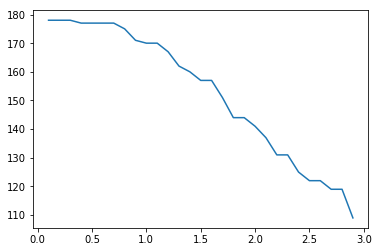

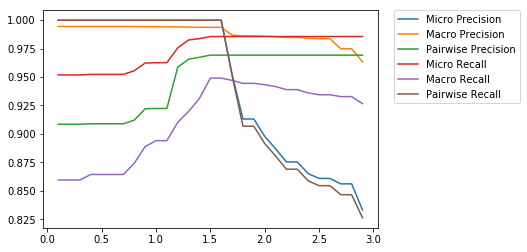

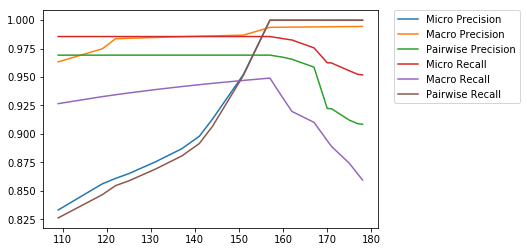

In [50]:
plt.plot(e1, result_num_cluster, label="original")
plt.show()
plt.plot(e1,micro_pre1, label = "Micro Precision")
plt.plot(e1,macro_pre1, label = "Macro Precision")
plt.plot(e1, pairwise_pre1, label = "Pairwise Precision")
plt.plot(e1,micro_re1, label = "Micro Recall")
plt.plot(e1,macro_re1, label = "Macro Recall")
plt.plot(e1, pairwise_re1, label = "Pairwise Recall")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.plot(result_num_cluster,micro_pre1, label = "Micro Precision")
plt.plot(result_num_cluster,macro_pre1, label = "Macro Precision")
plt.plot(result_num_cluster, pairwise_pre1, label = "Pairwise Precision")
plt.plot(result_num_cluster,micro_re1, label = "Micro Recall")
plt.plot(result_num_cluster,macro_re1, label = "Macro Recall")
plt.plot(result_num_cluster, pairwise_re1, label = "Pairwise Recall")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()